In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
IMDB = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
IMDB

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


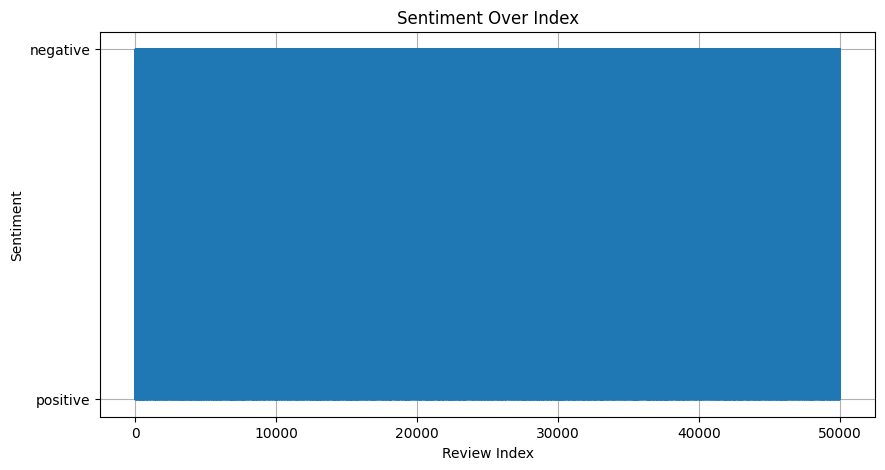

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(IMDB['sentiment'])
plt.title('Sentiment Over Index')
plt.xlabel('Review Index')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()


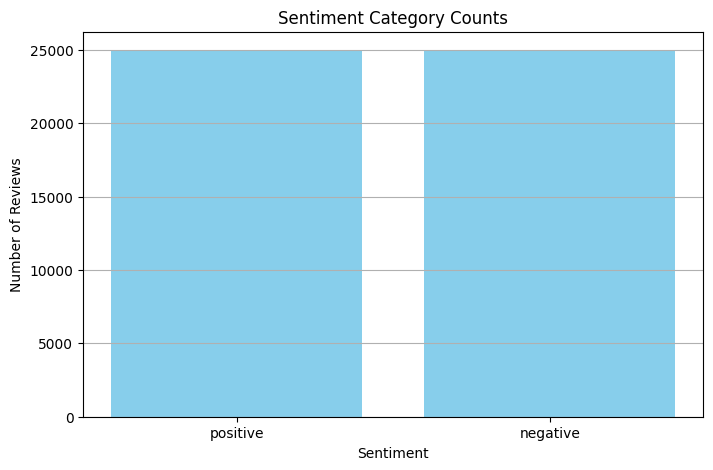

In [4]:
import matplotlib.pyplot as plt

# Count occurrences of each sentiment
sentiment_counts = IMDB['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.title('Sentiment Category Counts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()


In [11]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

# --- Preprocessing Function ---
def preprocess(text):
    text = text.lower()                          # Lowercase
    text = re.sub(r"http\S+|www.\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+", '', text)             # Remove mentions
    text = re.sub(r"#\w+", '', text)             # Remove hashtags
    text = re.sub(r"[^a-z\s]", '', text)         # Remove punctuation/numbers
    tokens = word_tokenize(text)                 # Tokenize
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)   # Return cleaned string instead of tokens

# --- Example: Load your IMDB dataset (replace with your actual dataset) ---
# Example: IMDB = pd.read_csv("IMDB_Dataset.csv")  # Ensure 'review' column exists

# --- Apply Preprocessing ---
IMDB['cleaned'] = IMDB['review'].apply(preprocess)

# --- Function to Get N-Gram Frequencies ---
def get_ngram_frequencies(text_series, ngram_range=(1, 1), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_series)
    freqs = pd.DataFrame(X.sum(axis=0).A1, index=vectorizer.get_feature_names_out(), columns=['Frequency'])
    return freqs.sort_values(by='Frequency', ascending=False).head(top_n)

# --- Get and Display Unigram, Bigram, Trigram Frequencies ---
unigrams = get_ngram_frequencies(IMDB['cleaned'], ngram_range=(1, 1))
bigrams = get_ngram_frequencies(IMDB['cleaned'], ngram_range=(2, 2))
trigrams = get_ngram_frequencies(IMDB['cleaned'], ngram_range=(3, 3))

print("Top Unigrams:\n", unigrams)
print("\nTop Bigrams:\n", bigrams)
print("\nTop Trigrams:\n", trigrams)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top Unigrams:
         Frequency
movie       83523
film        74459
one         51027
like        38992
good        28568
even        24576
would       24024
time        23269
really      22950
see         22535
story       22097
much        18947
well        18798
get         18205
great       17821
also        17818
bad         17718
people      17538
first       17155
dont        16951

Top Bigrams:
                  Frequency
ever seen             2528
ive seen              2203
special effects       2145
dont know             2057
even though           1940
one best              1864
looks like            1625
much better           1423
waste time            1413
see movie             1402
first time            1317
good movie            1305
ive ever              1301
watch movie           1255
look like             1253
new york              1249
dont think            1248
low budget            1228
years ago             1199
pretty much           1096

Top Trigrams:
          

In [12]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()                          # Lowercase
    text = re.sub(r"http\S+|www.\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+", '', text)             # Remove mentions
    text = re.sub(r"#\w+", '', text)             # Remove hashtags
    text = re.sub(r"[^a-z\s]", '', text)         # Remove punctuation/numbers
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords.words('english') and len(w) > 2]
    return tokens

# --- Function to Get N-Gram Frequencies ---
def get_ngram_frequencies(text_series, ngram_range=(1, 1), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_series)
    freqs = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
    freqs.columns = ['Frequency']
    return freqs.sort_values(by='Frequency', ascending=False).head(top_n)

# --- Load and Preprocess Dataset ---
# Ensure IMDB is already loaded as: IMDB = pd.read_csv('path/to/IMDB_Dataset.csv')

# --- Separate Positive and Negative Reviews ---
positive_reviews = IMDB[IMDB['sentiment'] == 'positive'].copy()
negative_reviews = IMDB[IMDB['sentiment'] == 'negative'].copy()

# --- Apply Preprocessing ---
positive_reviews['cleaned'] = positive_reviews['review'].apply(preprocess)
negative_reviews['cleaned'] = negative_reviews['review'].apply(preprocess)

# --- Get Frequencies ---
# Unigrams
positive_unigrams = get_ngram_frequencies(positive_reviews['cleaned'], ngram_range=(1, 1))
negative_unigrams = get_ngram_frequencies(negative_reviews['cleaned'], ngram_range=(1, 1))

# Bigrams (Binary)
positive_bigrams = get_ngram_frequencies(positive_reviews['cleaned'], ngram_range=(2, 2))
negative_bigrams = get_ngram_frequencies(negative_reviews['cleaned'], ngram_range=(2, 2))

# Trigrams (Trinity)
positive_trigrams = get_ngram_frequencies(positive_reviews['cleaned'], ngram_range=(3, 3))
negative_trigrams = get_ngram_frequencies(negative_reviews['cleaned'], ngram_range=(3, 3))

# --- Display Results ---
print("\n🔵 Top 20 Unigrams in Positive Reviews:\n", positive_unigrams)
print("\n🔴 Top 20 Unigrams in Negative Reviews:\n", negative_unigrams)

print("\n🔵 Top 20 Bigrams (Binary) in Positive Reviews:\n", positive_bigrams)
print("\n🔴 Top 20 Bigrams (Binary) in Negative Reviews:\n", negative_bigrams)

print("\n🔵 Top 20 Trigrams (Trinity) in Positive Reviews:\n", positive_trigrams)
print("\n🔴 Top 20 Trigrams (Trinity) in Negative Reviews:\n", negative_trigrams)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔵 Top 20 Unigrams in Positive Reviews:
         Frequency
film        39416
movie       36026
one         26099
like        17146
good        14392
great       12733
story       12395
see         11930
time        11779
well        11122
also        10704
really      10696
would       10377
even         9482
much         9033
first        8961
films        8455
love         8416
people       8391
best         8323

🔴 Top 20 Unigrams in Negative Reviews:
         Frequency
movie       47497
film        35043
one         24928
like        21846
even        15094
good        14176
bad         14131
would       13647
really      12254
time        11490
see         10605
dont        10266
get         10008
much         9914
story        9702
people       9147
could        9039
make         8997
made         8394
movies       8364

🔵 Top 20 Bigrams (Binary) in Positive Reviews:
                  Frequency
one best              1633
ive seen              1087
even though           1060
ever 

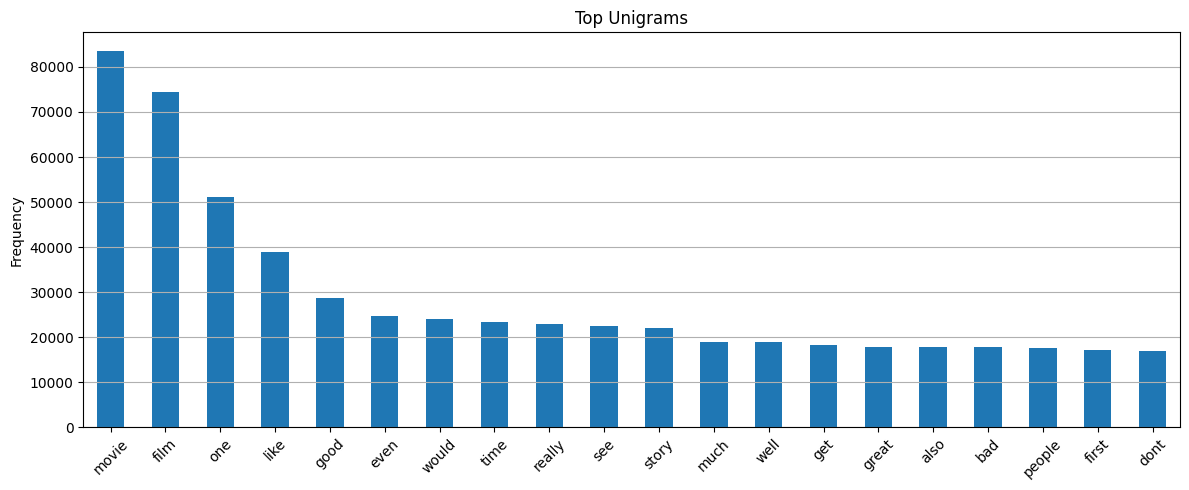

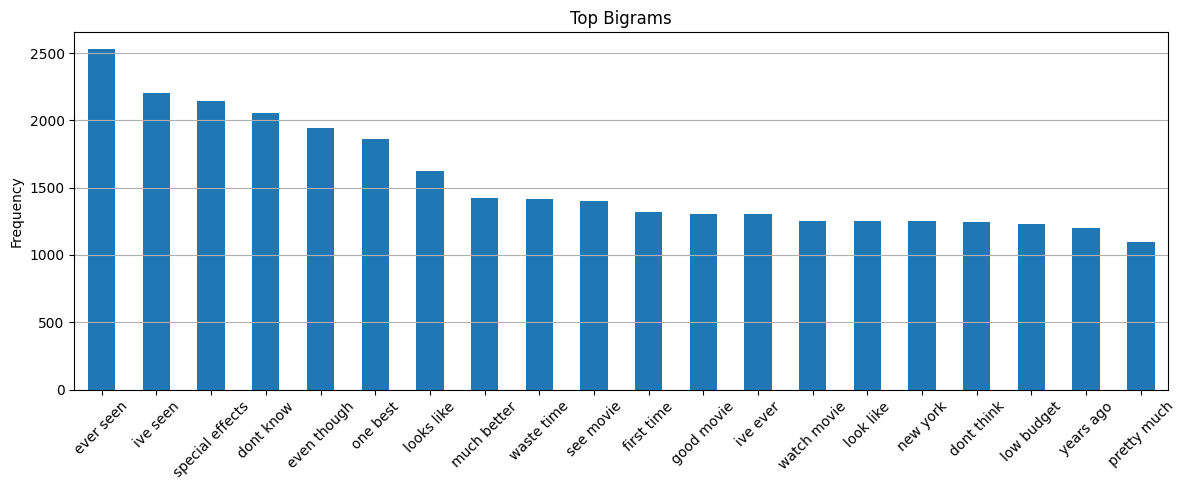

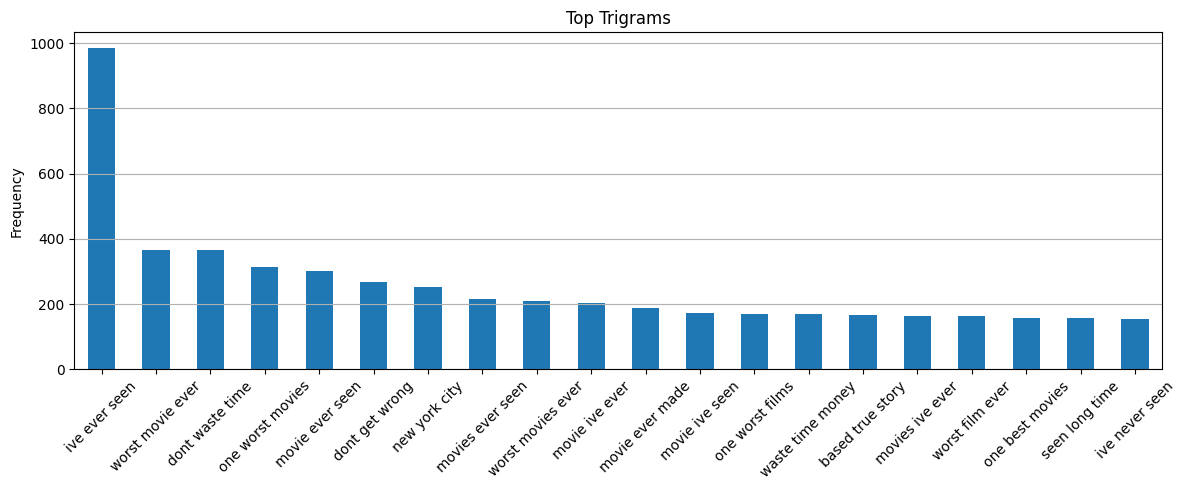

In [13]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams_df, title):
    ngrams_df.head(20).plot(kind='bar', figsize=(12,5), legend=False)
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Plot examples
plot_ngrams(unigrams, "Top Unigrams")
plot_ngrams(bigrams, "Top Bigrams")
plot_ngrams(trigrams, "Top Trigrams")


Identify the most common words or phrases in positive vs. negative reviews.

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


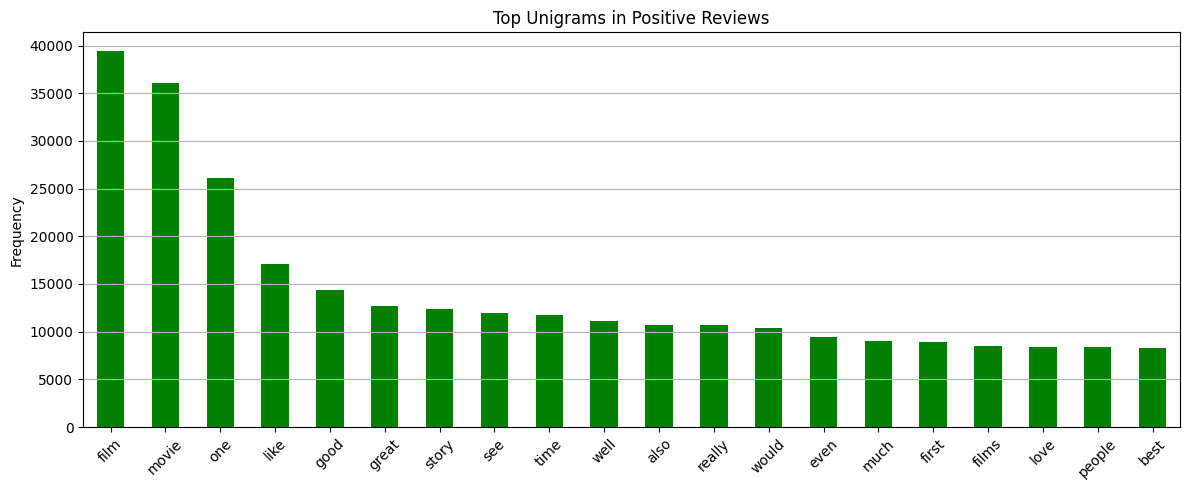

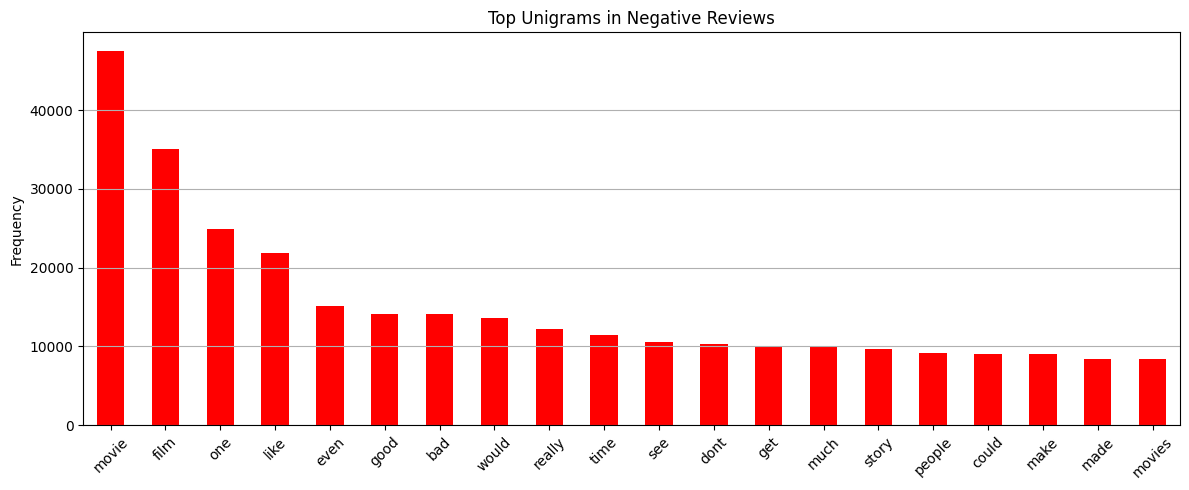

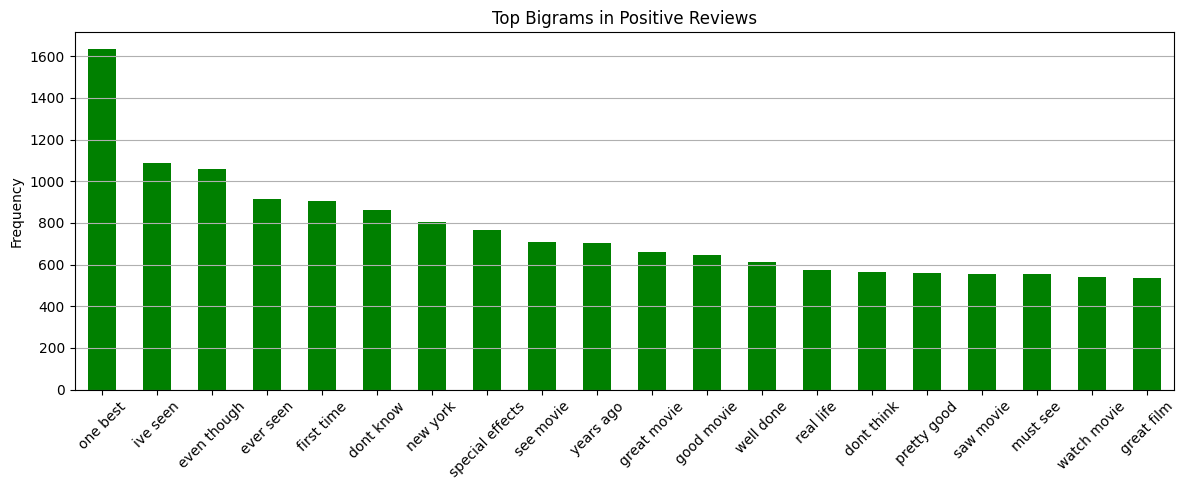

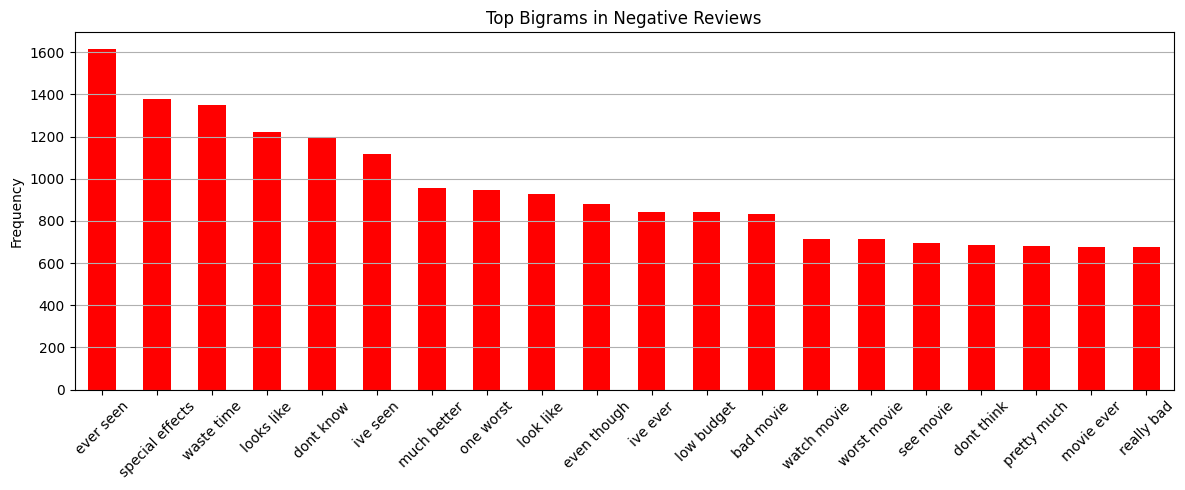

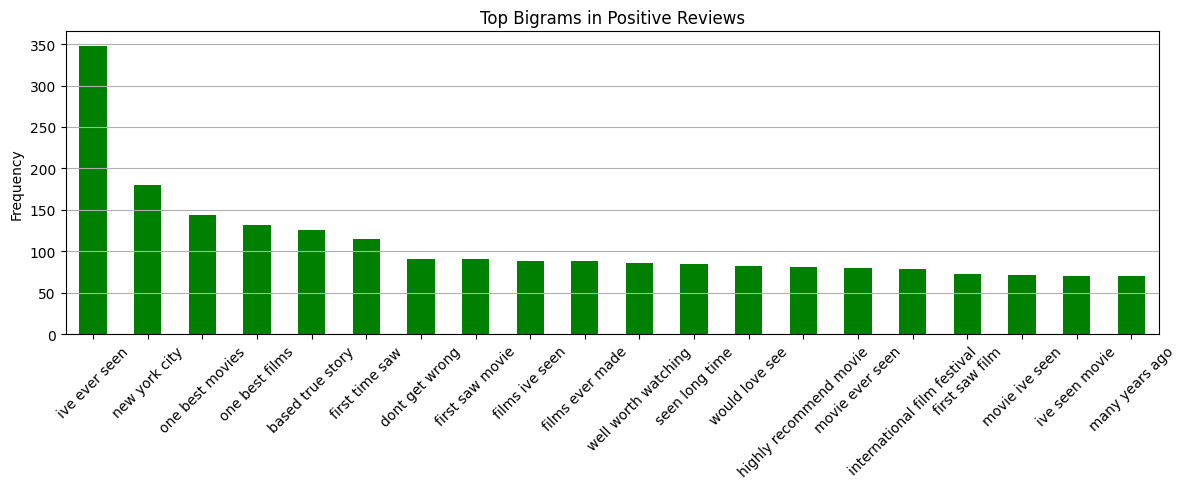

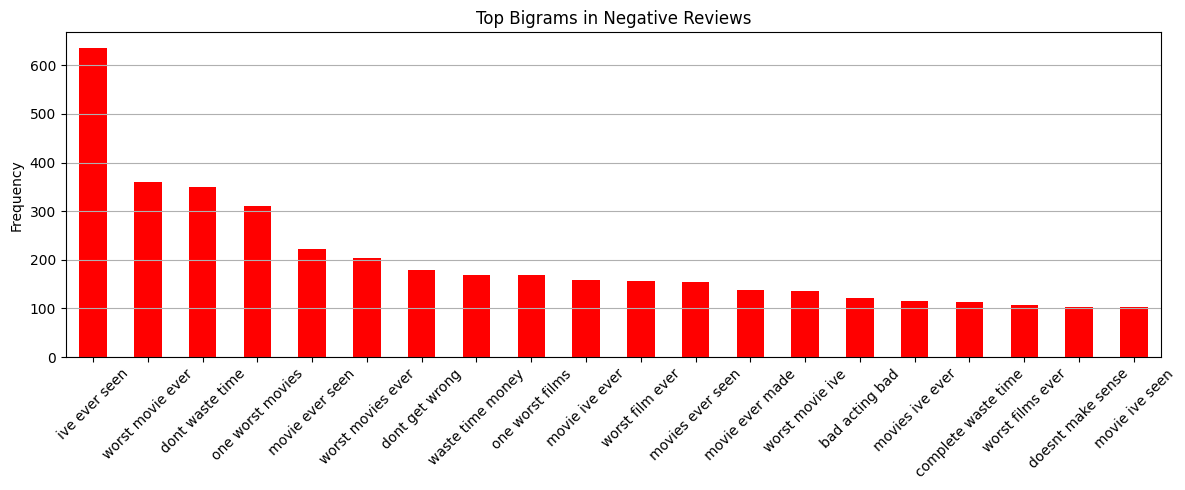

In [14]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()                          # Lowercase
    text = re.sub(r"http\S+|www.\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+", '', text)             # Remove mentions
    text = re.sub(r"#\w+", '', text)             # Remove hashtags
    text = re.sub(r"[^a-z\s]", '', text)         # Remove punctuation/numbers
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords.words('english') and len(w) > 2]
    return tokens

# --- 2. Clean the Reviews ---
IMDB['cleaned'] = IMDB['review'].apply(preprocess)

# --- 3. Split Positive and Negative ---
positive_reviews = IMDB[IMDB['sentiment'] == 'positive']['cleaned']
negative_reviews = IMDB[IMDB['sentiment'] == 'negative']['cleaned']

# --- 4. Function to Get N-Gram Frequencies ---
def get_ngram_freq(text_series, ngram_range=(1, 1), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_series)
    freqs = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
    freqs.columns = ['Frequency']
    return freqs.sort_values(by='Frequency', ascending=False).head(top_n)

# --- 5. Get Top N-Grams ---
top_pos_unigrams = get_ngram_freq(positive_reviews, ngram_range=(1, 1), top_n=20)
top_neg_unigrams = get_ngram_freq(negative_reviews, ngram_range=(1, 1), top_n=20)

top_pos_bigrams = get_ngram_freq(positive_reviews, ngram_range=(2, 2), top_n=20)
top_neg_bigrams = get_ngram_freq(negative_reviews, ngram_range=(2, 2), top_n=20)

top_pos_trigrams = get_ngram_freq(positive_reviews, ngram_range=(3, 3), top_n=20)
top_neg_trigrams = get_ngram_freq(negative_reviews, ngram_range=(3, 3), top_n=20)

# --- 6. Plotting Function ---
def plot_ngram_freq(freq_df, title, color='skyblue'):
    freq_df.plot(kind='bar', figsize=(12,5), legend=False, color=color)
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# --- 7. Plot the Results ---
plot_ngram_freq(top_pos_unigrams, "Top Unigrams in Positive Reviews", color='green')
plot_ngram_freq(top_neg_unigrams, "Top Unigrams in Negative Reviews", color='red')

plot_ngram_freq(top_pos_bigrams, "Top Bigrams in Positive Reviews", color='green')
plot_ngram_freq(top_neg_bigrams, "Top Bigrams in Negative Reviews", color='red')

plot_ngram_freq(top_pos_trigrams, "Top Bigrams in Positive Reviews", color='green')
plot_ngram_freq(top_neg_trigrams, "Top Bigrams in Negative Reviews", color='red')
